<a href="https://colab.research.google.com/github/cxbxmxcx/EvolutionaryDeepLearning/blob/main/EDL_2_3_Simulating_Life.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title INSTALLS
!pip install livelossplot --quiet

In [ ]:
import random
import time
import matplotlib.pyplot as plt
from livelossplot import PlotLosses

In [ ]:
RPRD_BOUNDS = 25
DEATH_BOUNDS = 25

def create_cell():
  return dict(
      health = random.randint(1, 100),
      strength = random.randint(1, 100)
    )                     

def birth(offspring):
  return [create_cell() for i in range(offspring)]

def evaluate(cells):
  for cell in cells:
    cell["health"] *= cell["strength"]/100 
  return cells
  
def reproduce(cells):
  return [create_cell() for cell in cells if cell["health"] > RPRD_BOUNDS]  

def death(cells):  
  return [cell for cell in cells if cell["health"] > DEATH_BOUNDS ]

def run_generation(cells):
  cells = evaluate(cells)
  cells.extend(reproduce(cells))
  return death(cells)

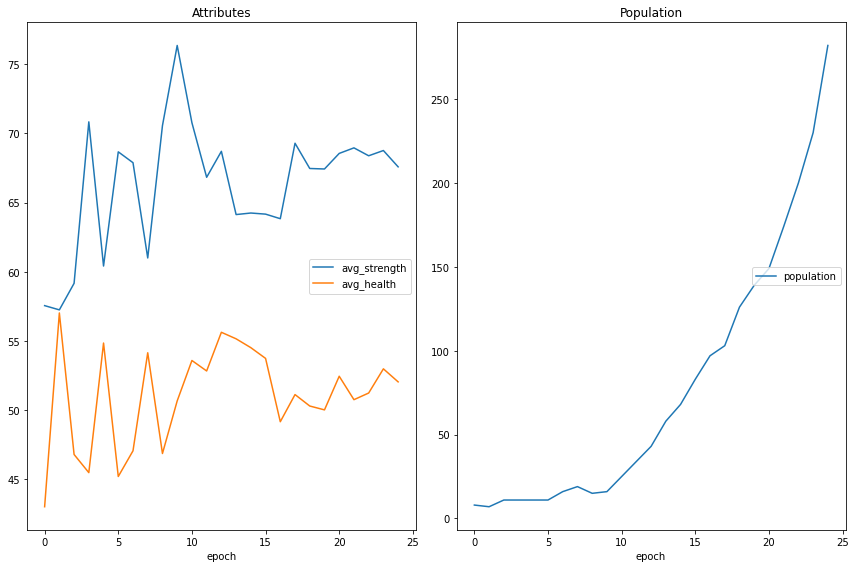

Attributes
	avg_strength     	 (min:   57.250, max:   76.353, cur:   67.583)
	avg_health       	 (min:   43.026, max:   57.027, cur:   52.047)
Population
	population       	 (min:    7.000, max:  282.000, cur:  282.000)


In [ ]:
#@title Default title text
generations = 25 #@param {type:"slider", min:1, max:25, step:1}
initial_offspring = 10 #@param {type:"slider", min:10, max:1000, step:1}
reproduction_bounds = 50#@param {type:"slider", min:1, max:100, step:1}
death_bounds = 25 #@param {type:"slider", min:1, max:100, step:1}

RPRD_RATE = reproduction_bounds
DEATH_RATE = death_bounds
cells = birth(initial_offspring)

groups = {'Population': ['population'], 'Attributes' : ['avg_strength','avg_health']}
liveloss = PlotLosses(groups=groups)

history = {}
for i in range(generations):  
  cells = run_generation(cells)  
  history["population"] = len(cells)
  history["avg_strength"] = sum([cell["strength"] for cell in cells])/(len(cells)+1) 
  history["avg_health"] = sum([cell["health"] for cell in cells])/(len(cells)+1) 
  liveloss.update(history)
  liveloss.send() 
  